In [51]:
import pandas as pd

In [52]:
df=pd.read_csv("Mall_Customers.csv")

In [53]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [54]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [55]:
df.shape
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [56]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [57]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [58]:
df.duplicated().sum()

np.int64(0)

In [59]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [60]:
x=df[["Age"  , "Spending Score (1-100)" ]]

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [63]:
from sklearn.cluster import KMeans
inertia = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)


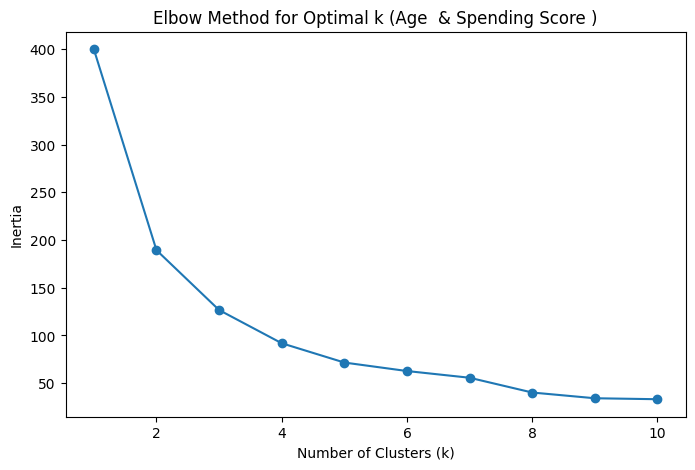

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k (Age  & Spending Score )")
plt.show()

In [65]:
model = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = model.fit_predict(x_scaled)


In [66]:
df.to_csv("customers_with_clusters.csv", index=False)

In [67]:
print("✅ Clustering complete! Results saved to 'customers_with_clusters.csv'")
print(df.head())

✅ Clustering complete! Results saved to 'customers_with_clusters.csv'
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        1  
2        3  
3        1  
4        2  


In [68]:
# Get cluster centers (they are scaled, so inverse transform them)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers = pd.DataFrame(centers, columns=["Age", "Spending Score (1-100)"])
print(cluster_centers)


         Age  Spending Score (1-100)
0  54.400000               52.266667
1  27.225806               74.709677
2  30.000000               13.058824
3  33.206897               88.517241
4  46.173913               44.086957
5  32.722222               44.888889
6  46.000000               18.250000
7  66.800000               48.933333
8  58.900000                9.900000
9  21.590909               51.409091


In [69]:
cluster_labels = {
    0: "Older, Moderate Spenders",
    1: "Young, High Spenders",
    2: "Very Young, Average Spenders",
    3: "Mid-aged, Low Spenders"
}

df["Cluster_Label"] = df["Cluster"].map(cluster_labels)


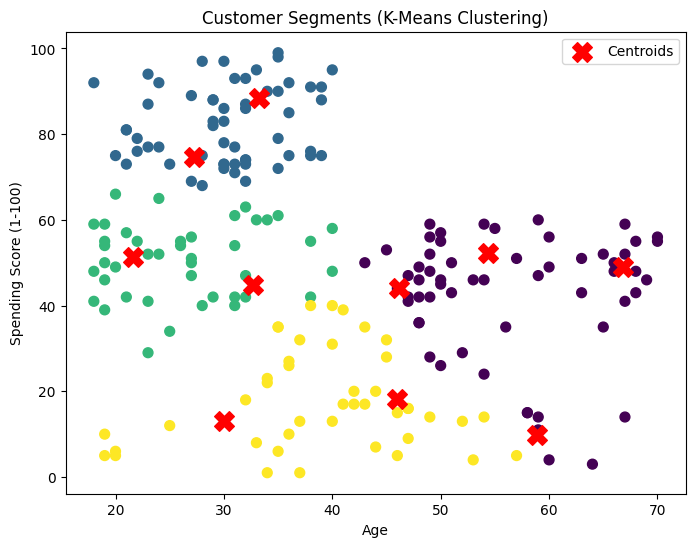

In [70]:
import matplotlib.pyplot as plt

# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(df["Age"], df["Spending Score (1-100)"],
            c=df["Cluster"], cmap="viridis", s=50)

# Plot centroids
plt.scatter(cluster_centers["Age"], cluster_centers["Spending Score (1-100)"],
            c="red", marker="X", s=200, label="Centroids")

plt.title("Customer Segments (K-Means Clustering)")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()


In [71]:
import joblib

joblib.dump(model,"kmeans_model.pkl")
joblib.dump(scaler,"scaler.pkl")
print("Model and Scaler saved successfully!")

Model and Scaler saved successfully!
